In [1]:
#Cargamos las librerías necesarias para el análisis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import time 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import hilbert

In [59]:
df_hc = pd.read_excel('Database__writng_ML.xlsx','HC')
del df_hc['n'] # eliminamos la numeración
del df_hc['Suj']# delete the subject ID
df_hc

FIRMA  ESPAÑOL  POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  GRIEGO.1  \
0    25.4     16.4    17.1    19.6  0.108883   0.121874  0.118214  0.120272   
1    22.2     16.0    15.9    17.4  0.095805   0.085368  0.089510  0.097469   
2     5.4     19.0    18.2    19.9  0.096043   0.095185  0.095094  0.093584   
3    42.7     14.7    15.2    15.6  0.089720   0.092022  0.087143  0.090333   
4    24.7     16.2    16.3    19.2  0.084755   0.086007  0.082206  0.086733   
5    16.2     20.8    19.0    17.1  0.081922   0.088233  0.080630  0.087637   
6    18.0     16.0    15.7    16.0  0.089825   0.088133  0.079560  0.078089   
7    39.2     15.0    14.0    16.1  0.086789   0.086023  0.089615  0.097128   
8    16.8     17.1    16.7    19.2  0.095978   0.093610  0.095581  0.103633   
9    38.6     12.6    12.7    17.5  0.070617   0.076512  0.074996  0.079944   
10    6.1     17.1    18.3    19.7  0.106351   0.123024  0.112275  0.109799   
11   13.6     15.4    16.9    18.9  0.089300   0.079573  0.077262  0.076618   
12   10.9     15.5    16.8    18.6  0.098897   0.084187  0.089715  0.096764   
13   17.9     17.8    17.9    20.0  0.085201   0.089101  0.083969  0.087379   
14   21.3     16.9    17.0    19.8  0.094807   0.096988  0.097636  0.100819   
15   26.3     16.6    18.1    19.0  0.091783   0.094759  0.091719  0.087962   
16    6.1     18.3    17.6    17.4  0.099037   0.096807  0.099411  0.132399   
17   13.4     16.1    17.0    20.5  0.103858   0.112082  0.097947  0.108505   
18   28.2     15.7    16.1    17.9  0.089456   0.086343  0.083720  0.092552   
19   18.1     14.3    15.8    15.8  0.102129   0.097686  0.108431  0.087275   
20   15.4     14.1    14.2    17.0  0.086016   0.086041  0.081277  0.075118   
21   43.5     17.2    16.8    20.3  0.091983   0.096861  0.100779  0.116013   
22   14.0     15.8    15.9    18.0  0.092708   0.103943  0.097219  0.097262   
23   13.9     17.9    18.3    22.0  0.125355   0.155393  0.145674  0.176419   
24   13.7     17.5    14.9    12.5  0.099104   0.097999  0.102879  0.097397   
25    7.4     15.7    15.2    19.2  0.070861   0.074865  0.076514  0.075717   
26   24.8     17.2    17.1    17.8  0.081795   0.092108  0.085544  0.094880   
27   29.8     14.4    13.8    16.0  0.109589   0.094864  0.098176  0.101688   
28   12.7     15.4    16.1    17.9  0.096399   0.089268  0.086731  0.095554   
29   34.8     17.4    15.2    20.1  0.087225   0.091367  0.090867  0.099699   

       FIRMA.2  ESPAÑOL.2  ...  POLACO.12  GRIEGO.12  FIRMA.13  ESPAÑOL.13  \
0    34.661764  34.816985  ...    80.4701    85.6216    39.702      19.708   
1    34.221605  40.726508  ...   110.6461   136.5290    80.938      24.258   
2    54.837218  43.292992  ...   147.8226   154.9140    56.290      31.122   
3    52.247774  47.168980  ...    84.5709   106.5930    57.486      26.026   
4    56.839508  39.259491  ...    77.3339   108.9190    33.410      19.994   
5    59.292099  37.031557  ...   132.6448   143.2714    59.774      31.434   
6    75.960768  45.378119  ...   112.0274   135.8508    48.360      29.588   
7    20.623538  19.922194  ...    49.3653    66.7203    18.096      11.258   
8    97.157886  79.937440  ...   208.5180   242.5020    72.618      45.084   
9    27.531757  26.686306  ...    66.8454    87.3673    20.020      12.428   
10   61.813863  30.756592  ...   118.4451   147.6680    40.924      24.466   
11   92.710904  58.212084  ...   115.1155   124.2974    44.512      27.560   
12   48.547103  52.627259  ...    96.5498   114.1776    34.840      29.484   
13   59.716534  45.550601  ...    97.1693   123.9857    46.098      29.068   
14   44.796352  32.709987  ...    90.3125   110.1759    37.388      19.916   
15   72.377052  67.336847  ...   169.0440   208.0760    58.422      45.786   
16   81.104511  77.057456  ...   174.9160   166.6210    82.004      34.554   
17   43.763776  42.181210  ...   108.0824   149.4816    50.076      33.488   
18   59.221002  46.747339  ...    55.7111    71.2401    59.852      26.2

In [60]:
df_R = pd.read_excel('Database__writng_ML.xlsx','PD_RIGHT_MAS')
del df_R['n'] # eliminamos la numeración
del df_R['Suj']# delete the subject ID
df_R

FIRMA  ESPAÑOL     POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  \
0    24.5     16.4  17.600000    19.6  0.111345   0.107417  0.105161   
1    36.9     16.3  17.500000    20.6  0.114699   0.112580  0.111857   
2    16.9     16.3  16.100000    19.7  0.121732   0.106123  0.107220   
3    20.8     15.2  17.400000    18.7  0.113289   0.101889  0.098939   
4     9.0     17.5  18.700000    21.4  0.162326   0.146722  0.132083   
5    13.4     18.0  16.100000    19.0  0.137197   0.139267  0.134482   
6    16.1     16.3  16.300000    20.3  0.121055   0.120693  0.116152   
7    10.2     17.1  17.200000    18.7  0.155789   0.156593  0.134700   
8    19.8     15.1  14.400000    17.6  0.089823   0.088401  0.089851   
9    15.0     15.5  14.600000    17.3  0.089283   0.096631  0.096339   
10   42.6     17.2  16.500000    20.8  0.145449   0.166442  0.155686   
11   14.3     15.9  14.100000    14.5  0.087228   0.086280  0.082337   
12    6.6     16.1  14.900000    17.6  0.108232   0.101818  0.108645   
13    3.0     12.5  11.900000    14.7  0.154271   0.133177  0.147955   
14   38.6     16.8  16.900000    17.4  0.102513   0.096990  0.097534   
15   12.6     13.4  12.454545    16.8  0.122062   0.113003  0.376798   
16   26.5     13.9  14.300000    17.5  0.100533   0.109146  0.102553   
17    6.3     16.9  16.000000    17.0  0.085396   0.079600  0.082582   
18   37.7     18.9  20.600000    26.7  0.104787   0.113134  0.111378   
19    7.8     15.4  16.800000    18.9  0.081038   0.079134  0.073515   
20   12.7     16.0  16.100000    16.8  0.163141   0.142673  0.127353   
21   23.3     15.3  15.400000    16.2  0.104398   0.094282  0.102247   
22    8.3     13.6  14.100000    16.0  0.109803   0.110399  0.102473   
23   23.4     15.8  16.800000    19.1  0.146881   0.143391  0.131070   
24   27.5     16.7  15.200000    21.5  0.082372   0.084325  0.081875   
25    6.9     15.9  14.100000    17.1  0.133987   0.139394  0.140496   
26   22.5     18.3  16.100000    18.3  0.121564   0.118178  0.110969   
27   16.6     14.5  14.200000    15.4  0.085790   0.088619  0.084623   

    GRIEGO.1    FIRMA.2  ESPAÑOL.2  ...   POLACO.12  GRIEGO.12  FIRMA.13  \
0   0.124801  51.980051  35.431135  ...   69.412200    83.3480    51.688   
1   0.114244  31.585974  28.683191  ...   79.603300    96.4570    34.476   
2   0.098120  43.776241  41.917639  ...   84.952600   111.6008    45.994   
3   0.103503  39.906989  24.478558  ...   70.862100    96.9947    44.564   
4   0.168736  75.823638  54.683994  ...  150.074000   213.2560   118.872   
5   0.160566  17.518342  20.560736  ...   58.050300    82.5159    21.294   
6   0.134974  21.862781  21.971730  ...   80.831000   122.2680    22.386   
7   0.148414  22.343446  17.307438  ...   64.374700    79.7882    30.420   
8   0.091847  39.198679  37.181823  ...   64.662900    64.9247    27.872   
9   0.097117  30.415059  28.794873  ...   82.564200    93.6627    27.482   
10  0.164722  25.476464  24.647571  ...   85.744100    94.3948    30.862   
11  0.096871  43.947623  43.061301  ...  103.310400   111.6757    37.232   
12  0.110503  30.135791  27.652313  ...   57.680200    78.9356    24.778   
13  0.142556  20.548106  20.762998  ...   84.247000    88.9258    22.542   
14  0.104773  26.363507  29.332876  ...  101.665500   123.6713    33.618   
15  0.113281  34.700418  24.371480  ...   69.547545    84.8322    31.070   
16  0.116183  34.261175  30.690412  ...   84.591900   118.5799    25.740   
17  0.095840  36.091095  27.549309  ...   72.711000    75.7622    56.888   
18  0.130802  42.176534  37.282837  ...  110.090300   125.0588    56.290   
19  0.084583  39.234745  34.561047  ...  103.936700   125.9271    40.560   
20  0.124854  52.326672  33.774137  ...   85.195700   103.7357    60.086   
21  0.119851  24.205060  30.102676  ...  100.829700   116.1756    22.984   
22  0.107194  15.775688  15.294449  ...   48.536600    56.9756    14.534   
23  0.129151  21.717855  23.158207  ...   78.167500    75.2190    20.904   
24  0.098592  4

In [61]:
df_L = pd.read_excel('Database__writng_ML.xlsx','PD_leftAS')
del df_L['n']
del df_L['Suj']
df_L

FIRMA  ESPAÑOL  POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  GRIEGO.1  \
0    22.3     17.7    16.8    22.8  0.101250   0.087574  0.088616  0.089738   
1     9.4     14.5    14.0    17.5  0.097587   0.095146  0.085198  0.090825   
2    22.9     19.4    18.0    20.9  0.120343   0.137844  0.144629  0.139185   
3     8.5     15.8    15.8    16.2  0.139631   0.132456  0.113390  0.135835   
4    17.5     16.2    16.4    18.3  0.083564   0.080962  0.081591  0.094447   
5    11.9     14.4    13.4    15.8  0.079053   0.075054  0.081009  0.083987   
6    28.3     12.1    15.4    17.0  0.066389   0.072133  0.072159  0.081591   
7    14.5     14.7    14.5    16.5  0.081015   0.075772  0.078041  0.073348   
8     7.6     16.5    16.1    16.6  0.082450   0.080978  0.081474  0.088829   
9    15.8     14.9    15.6    17.2  0.102740   0.080397  0.079199  0.091321   
10   14.3     17.6    17.1    18.5  0.107917   0.105188  0.107367  0.113288   
11   35.8     15.8    16.9    19.3  0.117328   0.127319  0.122039  0.132819   
12    7.1     15.2    16.3    19.9  0.084597   0.084634  0.079072  0.095878   
13   27.0     16.7    18.7    20.4  0.118306   0.134770  0.138101  0.146997   
14   19.6     15.2    15.1    18.8  0.116651   0.096324  0.096204  0.111953   
15    6.1     16.2    15.4    15.9  0.117045   0.123514  0.118458  0.124856   
16   26.9     16.6    16.4    21.2  0.122129   0.123340  0.107120  0.124060   
17   15.8     15.4    15.6    17.2  0.090532   0.076803  0.075253  0.076783   
18   13.5     15.5    12.0    16.9  0.093582   0.094452  0.089274  0.092366   
19   12.7     16.4    17.3    19.4  0.088727   0.090838  0.076610  0.074187   
20   17.0     16.3    17.1    18.5  0.085997   0.094468  0.093234  0.104381   

      FIRMA.2  ESPAÑOL.2  ...  POLACO.12  GRIEGO.12  FIRMA.13  ESPAÑOL.13  \
0   44.571642  35.179835  ...    82.4345    77.9639    29.120      21.996   
1   45.143004  38.447818  ...    89.9115   102.9896    42.588      24.206   
2   35.395728  29.886963  ...   120.8822   162.7952    40.248      27.586   
3   45.539904  27.366125  ...    97.5569   112.4173    64.844      25.402   
4   56.742972  42.556700  ...   103.0526   123.0622    29.120      24.024   
5   36.135288  25.880564  ...    68.1192    76.7453    29.224      12.870   
6   54.159928  51.116859  ...    74.1034    91.1252    32.838      29.016   
7   49.924556  36.958746  ...    69.7559    80.4942    37.258      20.046   
8   53.572038  41.903236  ...   106.7037   116.3736    54.366      30.394   
9   51.249638  43.541489  ...   107.6944   109.8492    41.522      22.126   
10  34.521781  44.168392  ...   106.1742   133.4490    32.526      28.236   
11  37.914228  34.743448  ...    94.5158   106.0493    31.824      20.904   
12  52.558774  35.746498  ...    74.4746    86.9246    51.454      25.844   
13  45.068337  43.017377  ...   137.7446   138.7910    63.466      36.374   
14  30.280556  23.601703  ...    62.0991    77.8642    33.982      15.340   
15  14.071680  11.339983  ...    49.4508    62.6022    14.560       9.334   
16  30.368007  23.912996  ...    50.1998    68.9540    41.730      19.396   
17  66.098236  41.350605  ...    80.9544    97.5440    47.892      29.458   
18  22.817900  11.204411  ...    45.6374    67.5729    23.270      11.570   
19  70.011464  50.635667  ...   100.8482    98.6004    79.690      43.914   
20  37.170205  43.581406  ...    94.1641    96.7089    30.056      22.932   

    POLACO.13  GRIEGO.13  FIRMA.14  ESPAÑOL.14  POLACO.14  GRIEGO.14  
0      19.318     19.838    62.296      71.916     82.056     77.688  
1      21.658     24.986    47.736      83.226     89.414    102.544  
2      31.850     28.964   121.524     127.816    120.458    162.370  
3      20.722     25.038    88.608     101.426     97.266    111.826  
4      22.152     27.508    61.750      78.156    102.362    122.460  
5      14.300     15.938    76.024      72.462     67.808     76.310  
6      35.724     31.798    82.446      70.226     73.138     90.532  
7 

In [90]:
frames = [df_L, df_R, df_hc]
X = pd.concat(frames, ignore_index=True)
X

FIRMA  ESPAÑOL  POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  GRIEGO.1  \
0    22.3     17.7    16.8    22.8  0.101250   0.087574  0.088616  0.089738   
1     9.4     14.5    14.0    17.5  0.097587   0.095146  0.085198  0.090825   
2    22.9     19.4    18.0    20.9  0.120343   0.137844  0.144629  0.139185   
3     8.5     15.8    15.8    16.2  0.139631   0.132456  0.113390  0.135835   
4    17.5     16.2    16.4    18.3  0.083564   0.080962  0.081591  0.094447   
..    ...      ...     ...     ...       ...        ...       ...       ...   
74    7.4     15.7    15.2    19.2  0.070861   0.074865  0.076514  0.075717   
75   24.8     17.2    17.1    17.8  0.081795   0.092108  0.085544  0.094880   
76   29.8     14.4    13.8    16.0  0.109589   0.094864  0.098176  0.101688   
77   12.7     15.4    16.1    17.9  0.096399   0.089268  0.086731  0.095554   
78   34.8     17.4    15.2    20.1  0.087225   0.091367  0.090867  0.099699   

      FIRMA.2  ESPAÑOL.2  ...  POLACO.12  GRIEGO.12  FIRMA.13  ESPAÑOL.13  \
0   44.571642  35.179835  ...    82.4345    77.9639    29.120      21.996   
1   45.143004  38.447818  ...    89.9115   102.9896    42.588      24.206   
2   35.395728  29.886963  ...   120.8822   162.7952    40.248      27.586   
3   45.539904  27.366125  ...    97.5569   112.4173    64.844      25.402   
4   56.742972  42.556700  ...   103.0526   123.0622    29.120      24.024   
..        ...        ...  ...        ...        ...       ...         ...   
74  62.474142  58.264004  ...   176.5600   184.6730    30.368      27.820   
75  30.309136  27.734502  ...   115.0805   148.9460    27.898      20.982   
76  39.183684  28.528989  ...    71.6470    86.2928    41.626      13.052   
77  71.161289  41.448530  ...   118.3470   121.2508    50.232      22.490   
78  68.858048  64.832916  ...   114.8209   145.9398    60.346      26.858   

    POLACO.13  GRIEGO.13  FIRMA.14  ESPAÑOL.14  POLACO.14  GRIEGO.14  
0      19.318     19.838    62.296      71.916     82.056     77.688  
1      21.658     24.986    47.736      83.226     89.414    102.544  
2      31.850     28.964   121.524     127.816    120.458    162.370  
3      20.722     25.038    88.608     101.426     97.266    111.826  
4      22.152     27.508    61.750      78.156    102.362    122.460  
..        ...        ...       ...         ...        ...        ...  
74     33.072     30.784    79.352     175.032    176.150    184.470  
75     23.738     29.640   106.990      86.502    114.582    147.654  
76     14.898     14.794    76.752      65.468     71.578     85.904  
77     23.348     27.742    48.230      98.124    118.066    120.484  
78     24.102     30.446   200.044     138.710    114.062    145.574  

[79 rows x 60 columns]

In [65]:
yhc=np.ones(30)*3
yl=np.ones(21)
yr=np.ones(28)*2
y = np.concatenate((yl, yr, yhc))
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [66]:
X['y']=y.tolist()# insert y to plot
X_selected=X
X

FIRMA  ESPAÑOL  POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  GRIEGO.1  \
0    22.3     17.7    16.8    22.8  0.101250   0.087574  0.088616  0.089738   
1     9.4     14.5    14.0    17.5  0.097587   0.095146  0.085198  0.090825   
2    22.9     19.4    18.0    20.9  0.120343   0.137844  0.144629  0.139185   
3     8.5     15.8    15.8    16.2  0.139631   0.132456  0.113390  0.135835   
4    17.5     16.2    16.4    18.3  0.083564   0.080962  0.081591  0.094447   
..    ...      ...     ...     ...       ...        ...       ...       ...   
74    7.4     15.7    15.2    19.2  0.070861   0.074865  0.076514  0.075717   
75   24.8     17.2    17.1    17.8  0.081795   0.092108  0.085544  0.094880   
76   29.8     14.4    13.8    16.0  0.109589   0.094864  0.098176  0.101688   
77   12.7     15.4    16.1    17.9  0.096399   0.089268  0.086731  0.095554   
78   34.8     17.4    15.2    20.1  0.087225   0.091367  0.090867  0.099699   

      FIRMA.2  ESPAÑOL.2  ...  GRIEGO.12  FIRMA.13  ESPAÑOL.13  POLACO.13  \
0   44.571642  35.179835  ...    77.9639    29.120      21.996     19.318   
1   45.143004  38.447818  ...   102.9896    42.588      24.206     21.658   
2   35.395728  29.886963  ...   162.7952    40.248      27.586     31.850   
3   45.539904  27.366125  ...   112.4173    64.844      25.402     20.722   
4   56.742972  42.556700  ...   123.0622    29.120      24.024     22.152   
..        ...        ...  ...        ...       ...         ...        ...   
74  62.474142  58.264004  ...   184.6730    30.368      27.820     33.072   
75  30.309136  27.734502  ...   148.9460    27.898      20.982     23.738   
76  39.183684  28.528989  ...    86.2928    41.626      13.052     14.898   
77  71.161289  41.448530  ...   121.2508    50.232      22.490     23.348   
78  68.858048  64.832916  ...   145.9398    60.346      26.858     24.102   

    GRIEGO.13  FIRMA.14  ESPAÑOL.14  POLACO.14  GRIEGO.14    y  
0      19.838    62.296      71.916     82.056     77.688  1.0  
1      24.986    47.736      83.226     89.414    102.544  1.0  
2      28.964   121.524     127.816    120.458    162.370  1.0  
3      25.038    88.608     101.426     97.266    111.826  1.0  
4      27.508    61.750      78.156    102.362    122.460  1.0  
..        ...       ...         ...        ...        ...  ...  
74     30.784    79.352     175.032    176.150    184.470  3.0  
75     29.640   106.990      86.502    114.582    147.654  3.0  
76     14.794    76.752      65.468     71.578     85.904  3.0  
77     27.742    48.230      98.124    118.066    120.484  3.0  
78     30.446   200.044     138.710    114.062    145.574  3.0  

[79 rows x 61 columns]

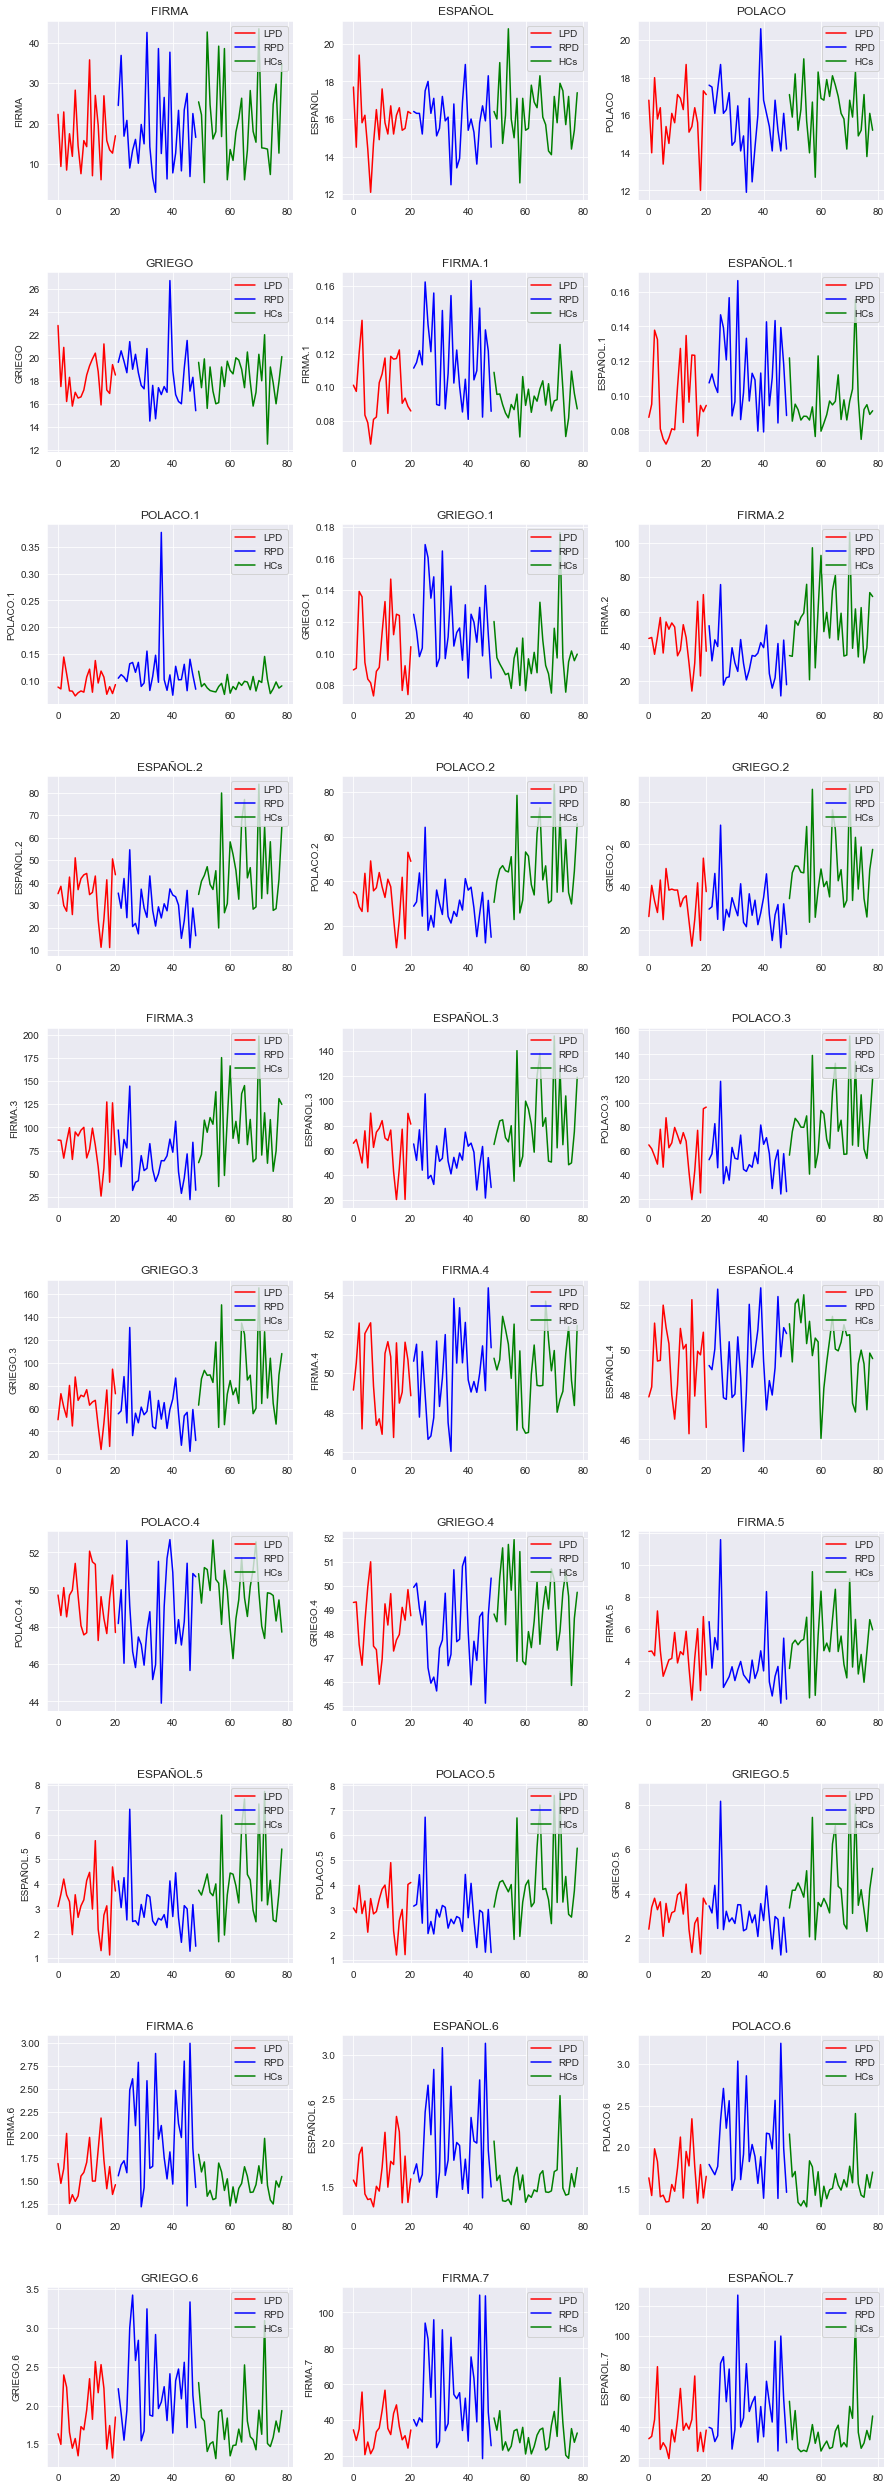

In [68]:
# plots para revisar variables o features extraidas
import warnings
warnings.filterwarnings('ignore')
# separo los 3 grupos para ver si existen ouliers que se relacionan con los grupos
LPD=X_selected.loc[X_selected['y'] == 1]
RPD=X_selected.loc[X_selected['y'] == 2]
HCs=X_selected.loc[X_selected['y'] == 3]
plt.subplots(figsize=(15,45))
sns.set_style('darkgrid')
plt.subplots_adjust (hspace=0.4, wspace=0.2)
i=0
for col in LPD.columns:
    i+=1
    plt.subplot(10,3,i)
    sns.lineplot(data=LPD[col],color='r',label='LPD')
    sns.lineplot(data=RPD[col],color='b',label='RPD')
    sns.lineplot(data=HCs[col],color='g',label='HCs')
    plt.legend(loc='upper right')
    plt.title(col)
    if i==30:
        break

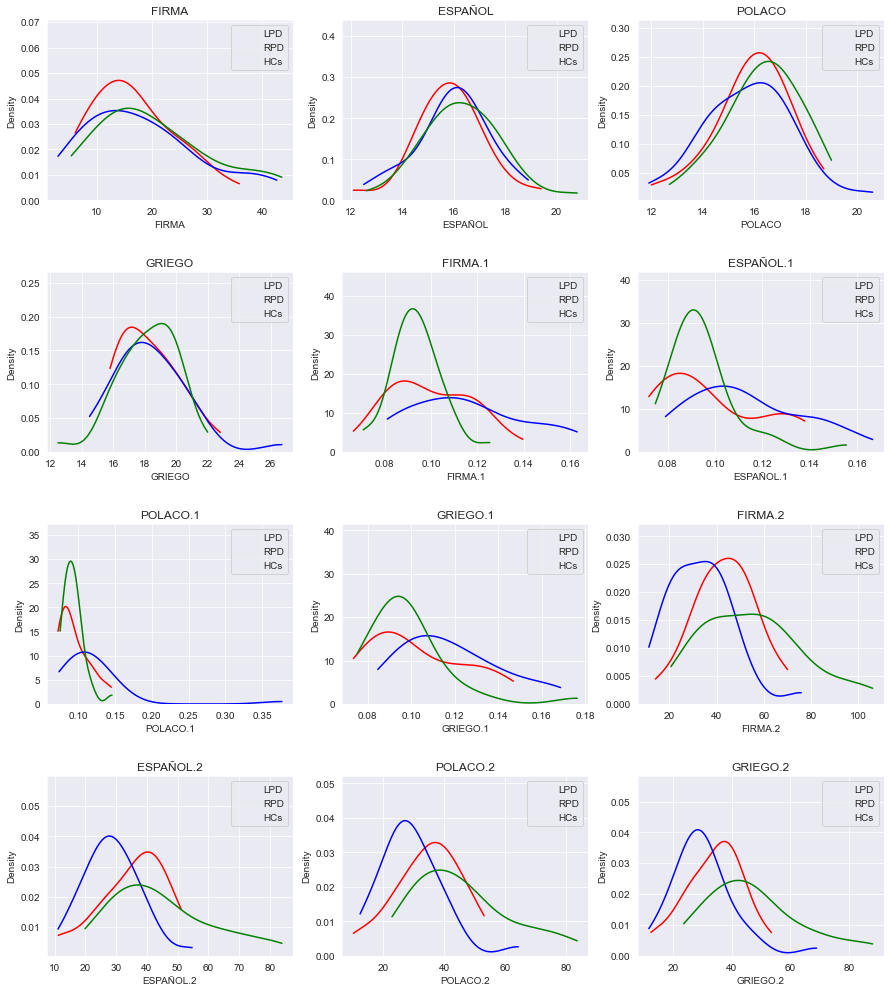

In [72]:
# Plot para analizar la distribución de cada una de las variables.
plt.subplots(figsize=(15,45))
sns.set_style('darkgrid')
plt.subplots_adjust (hspace=0.4, wspace=0.2)
i=0
for col in LPD.columns:
    i+=1
    plt.subplot(10,3,i)
    # first (0th) column of M is diagnosis, non-numerical
    sns.histplot(data=LPD[col],color="r", label="LPD", kde=True, stat="density", linewidth=0, element="poly", fill=False)
    sns.histplot(data=RPD[col],color="b", label="RPD", kde=True, stat="density", linewidth=0, element="step", fill=False)
    sns.histplot(data=HCs[col],color="g", label="HCs", kde=True, stat="density", linewidth=0, element="step", fill=False)
    plt.legend(loc='upper right')
    plt.title(col)
    if i==12:
        break

In [73]:
# delete the label y
del X['y']
X

FIRMA  ESPAÑOL  POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  GRIEGO.1  \
0    22.3     17.7    16.8    22.8  0.101250   0.087574  0.088616  0.089738   
1     9.4     14.5    14.0    17.5  0.097587   0.095146  0.085198  0.090825   
2    22.9     19.4    18.0    20.9  0.120343   0.137844  0.144629  0.139185   
3     8.5     15.8    15.8    16.2  0.139631   0.132456  0.113390  0.135835   
4    17.5     16.2    16.4    18.3  0.083564   0.080962  0.081591  0.094447   
..    ...      ...     ...     ...       ...        ...       ...       ...   
74    7.4     15.7    15.2    19.2  0.070861   0.074865  0.076514  0.075717   
75   24.8     17.2    17.1    17.8  0.081795   0.092108  0.085544  0.094880   
76   29.8     14.4    13.8    16.0  0.109589   0.094864  0.098176  0.101688   
77   12.7     15.4    16.1    17.9  0.096399   0.089268  0.086731  0.095554   
78   34.8     17.4    15.2    20.1  0.087225   0.091367  0.090867  0.099699   

      FIRMA.2  ESPAÑOL.2  ...  POLACO.12  GRIEGO.12  FIRMA.13  ESPAÑOL.13  \
0   44.571642  35.179835  ...    82.4345    77.9639    29.120      21.996   
1   45.143004  38.447818  ...    89.9115   102.9896    42.588      24.206   
2   35.395728  29.886963  ...   120.8822   162.7952    40.248      27.586   
3   45.539904  27.366125  ...    97.5569   112.4173    64.844      25.402   
4   56.742972  42.556700  ...   103.0526   123.0622    29.120      24.024   
..        ...        ...  ...        ...        ...       ...         ...   
74  62.474142  58.264004  ...   176.5600   184.6730    30.368      27.820   
75  30.309136  27.734502  ...   115.0805   148.9460    27.898      20.982   
76  39.183684  28.528989  ...    71.6470    86.2928    41.626      13.052   
77  71.161289  41.448530  ...   118.3470   121.2508    50.232      22.490   
78  68.858048  64.832916  ...   114.8209   145.9398    60.346      26.858   

    POLACO.13  GRIEGO.13  FIRMA.14  ESPAÑOL.14  POLACO.14  GRIEGO.14  
0      19.318     19.838    62.296      71.916     82.056     77.688  
1      21.658     24.986    47.736      83.226     89.414    102.544  
2      31.850     28.964   121.524     127.816    120.458    162.370  
3      20.722     25.038    88.608     101.426     97.266    111.826  
4      22.152     27.508    61.750      78.156    102.362    122.460  
..        ...        ...       ...         ...        ...        ...  
74     33.072     30.784    79.352     175.032    176.150    184.470  
75     23.738     29.640   106.990      86.502    114.582    147.654  
76     14.898     14.794    76.752      65.468     71.578     85.904  
77     23.348     27.742    48.230      98.124    118.066    120.484  
78     24.102     30.446   200.044     138.710    114.062    145.574  

[79 rows x 60 columns]

In [75]:
# normalize all data along columns
#test without normalize
scaler = StandardScaler() 
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
X

FIRMA   ESPAÑOL    POLACO    GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  \
0   0.335282  1.071563  0.476226  2.132136 -0.092821  -0.682992 -0.395960   
1  -0.947804 -1.039825 -1.246572 -0.381167 -0.264735  -0.337973 -0.488564   
2   0.394960  2.193237  1.214569  1.231140  0.803188   1.607623  1.121647   
3  -1.037322 -0.182074 -0.139059 -0.997638  1.708381   1.362089  0.275247   
4  -0.142145  0.081850  0.230112 -0.001801 -0.922790  -0.984284 -0.586282   
..       ...       ...       ...       ...       ...        ...       ...   
74 -1.146733 -0.248055 -0.508230  0.424987 -1.518948  -1.262081 -0.723853   
75  0.583942  0.741658  0.660812 -0.238905 -1.005815  -0.476428 -0.479176   
76  1.081263 -1.105806 -1.369629 -1.092479  0.298524  -0.350845 -0.136948   
77 -0.619573 -0.445997  0.045527 -0.191484 -0.320457  -0.605808 -0.447030   
78  1.578583  0.873620 -0.508230  0.851774 -0.751015  -0.510165 -0.334970   

    GRIEGO.1   FIRMA.2  ESPAÑOL.2  ...  POLACO.12  GRIEGO.12  FIRMA.13  \
0  -0.726595  0.008517  -0.107624  ...  -0.328340  -0.805978 -0.635806   
1  -0.680163  0.038244   0.112818  ...  -0.107405  -0.163219  0.083452   
2   1.385447 -0.468890  -0.464656  ...   0.807738   1.372825 -0.041515   
3   1.242365  0.058894  -0.634699  ...   0.118507   0.078922  1.272034   
4  -0.525483  0.641770   0.389984  ...   0.280897   0.352325 -0.635806   
..       ...       ...        ...  ...        ...        ...       ...   
74 -1.325484  0.939952   1.449523  ...   2.452941   1.934734 -0.569157   
75 -0.506982 -0.733536  -0.609850  ...   0.636305   1.017123 -0.701067   
76 -0.216172 -0.271809  -0.556258  ...  -0.647096  -0.592059  0.032077   
77 -0.478171  1.391929   0.315232  ...   0.732826   0.305801  0.491680   
78 -0.301115  1.272096   1.892630  ...   0.628635   0.939912  1.031818   

    ESPAÑOL.13  POLACO.13  GRIEGO.13  FIRMA.14  ESPAÑOL.14  POLACO.14  \
0    -0.198316  -0.505797  -0.624332 -0.682625   -0.460724  -0.324994   
1     0.044516  -0.278184  -0.154348 -1.008432   -0.140760  -0.106742   
2     0.415908   0.713196   0.208822  0.642710    1.120706   0.814079   
3     0.175932  -0.369229  -0.149601 -0.093846    0.374124   0.126162   
4     0.024518  -0.230133   0.075897 -0.694843   -0.284192   0.277319   
..         ...        ...        ...       ...         ...        ...   
74    0.441619   0.832060   0.374978 -0.300966    2.456463   2.466004   
75   -0.309734  -0.075862   0.270537  0.317485   -0.048081   0.639786   
76   -1.181075  -0.935732  -1.084821 -0.359146   -0.643140  -0.635790   
77   -0.144036  -0.113797   0.097260 -0.997378    0.280710   0.743128   
78    0.335916  -0.040455   0.344120  2.399739    1.428901   0.624362   

    GRIEGO.14  
0   -0.798139  
1   -0.157912  
2    1.383052  
3    0.081169  
4    0.355073  
..        ...  
74   1.952291  
75   1.004006  
76  -0.586516  
77   0.304176  
78   0.950430  

[79 rows x 60 columns]

[0.01092252 0.01268141 0.01205178 0.01118997 0.02334659 0.02451388
 0.01283598 0.01555648 0.02156684 0.01951834 0.01998761 0.02005253
 0.01840855 0.01799299 0.01645019 0.02479844 0.00954389 0.01388432
 0.01765986 0.01083675 0.01511065 0.01773367 0.01727025 0.02034508
 0.03283676 0.02688124 0.01944706 0.01565272 0.02015584 0.01084987
 0.02096902 0.0211349  0.02072343 0.01405045 0.0287375  0.01083514
 0.02163868 0.01563427 0.01330025 0.01251353 0.01295779 0.01119025
 0.0172908  0.0114747  0.01384617 0.01566647 0.02253717 0.01017317
 0.01503638 0.01452275 0.01723104 0.01618864 0.01098983 0.0136251
 0.01754016 0.00943503 0.01479657 0.00953691 0.015315   0.02102681]


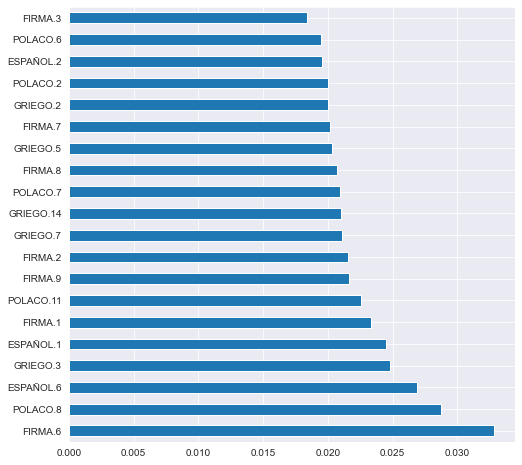

In [92]:
# feature importance based on Tree Based Classifiers
#X = features.iloc[:,0:1578]  #independent columns
#y = features.iloc[:,-1]    #target column i.e group (LPD, RPD and HCs)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(8,8))
plt.show()

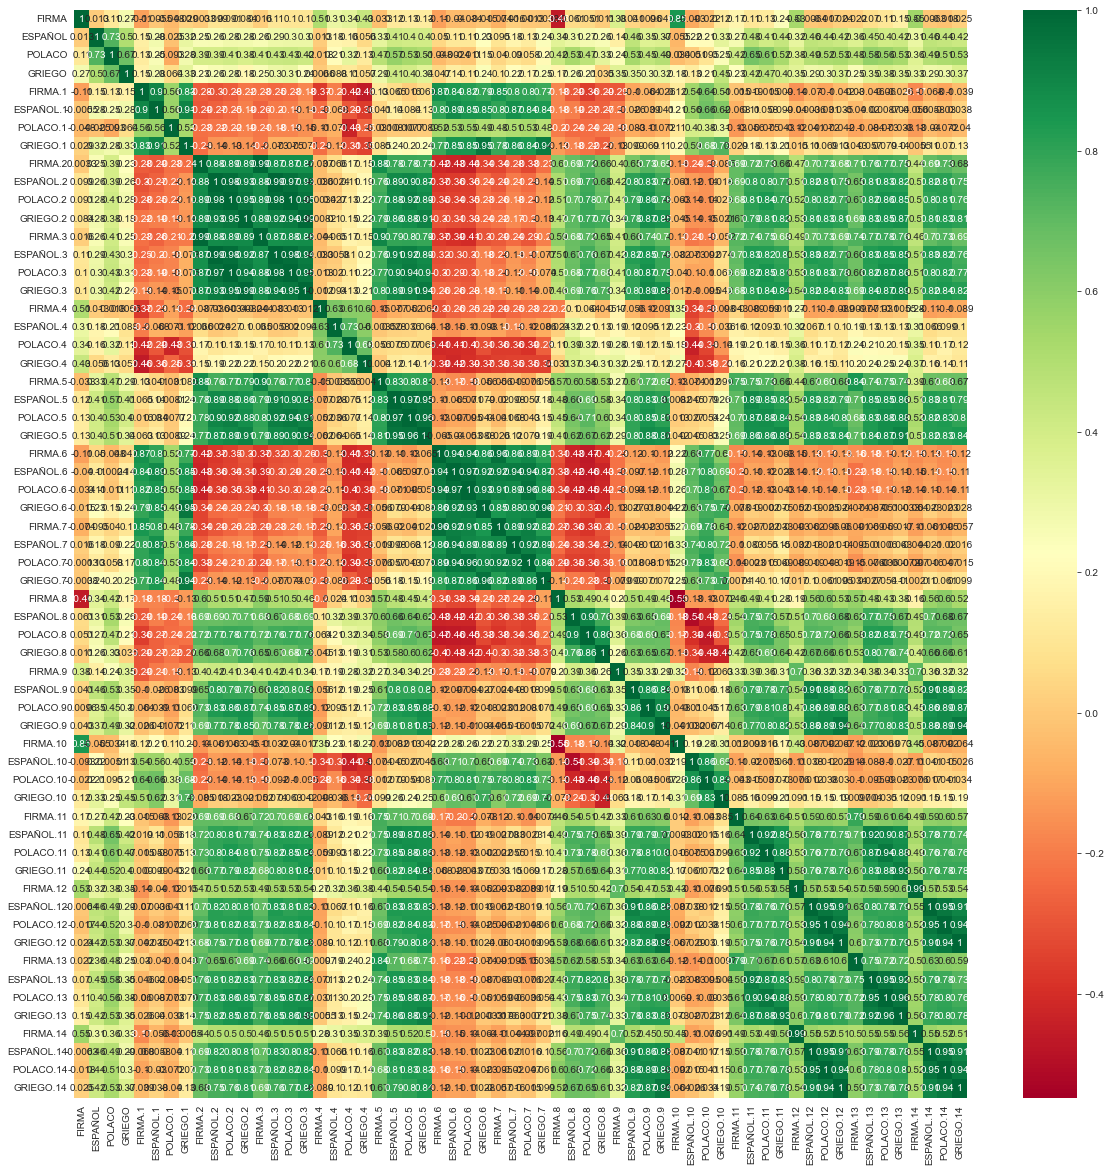

In [93]:
#get correlations of each features in dataset (you can re-run adding or removing higher correlated features)
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# once data preprocessing, Machine learning

In [85]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm

In [116]:
# split matrix in data for training and testing 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

FIRMA  ESPAÑOL     POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  \
34    3.0     12.5  11.900000    14.7  0.154271   0.133177  0.147955   
62   17.9     17.8  17.900000    20.0  0.085201   0.089101  0.083969   
42   23.3     15.3  15.400000    16.2  0.104398   0.094282  0.102247   
54   16.2     20.8  19.000000    17.1  0.081922   0.088233  0.080630   
16   26.9     16.6  16.400000    21.2  0.122129   0.123340  0.107120   
39   37.7     18.9  20.600000    26.7  0.104787   0.113134  0.111378   
56   39.2     15.0  14.000000    16.1  0.086789   0.086023  0.089615   
78   34.8     17.4  15.200000    20.1  0.087225   0.091367  0.090867   
7    14.5     14.7  14.500000    16.5  0.081015   0.075772  0.078041   
50   22.2     16.0  15.900000    17.4  0.095805   0.085368  0.089510   
53   24.7     16.2  16.300000    19.2  0.084755   0.086007  0.082206   
19   12.7     16.4  17.300000    19.4  0.088727   0.090838  0.076610   
66   13.4     16.1  17.000000    20.5  0.103858   0.112082  0.097947   
25    9.0     17.5  18.700000    21.4  0.162326   0.146722  0.132083   
44   23.4     15.8  16.800000    19.1  0.146881   0.143391  0.131070   
13   27.0     16.7  18.700000    20.4  0.118306   0.134770  0.138101   
75   24.8     17.2  17.100000    17.8  0.081795   0.092108  0.085544   
3     8.5     15.8  15.800000    16.2  0.139631   0.132456  0.113390   
17   15.8     15.4  15.600000    17.2  0.090532   0.076803  0.075253   
38    6.3     16.9  16.000000    17.0  0.085396   0.079600  0.082582   
8     7.6     16.5  16.100000    16.6  0.082450   0.080978  0.081474   
65    6.1     18.3  17.600000    17.4  0.099037   0.096807  0.099411   
6    28.3     12.1  15.400000    17.0  0.066389   0.072133  0.072159   
36   12.6     13.4  12.454545    16.8  0.122062   0.113003  0.376798   
72   13.9     17.9  18.300000    22.0  0.125355   0.155393  0.145674   
58   38.6     12.6  12.700000    17.5  0.070617   0.076512  0.074996   
46    6.9     15.9  14.100000    17.1  0.133987   0.139394  0.140496   
77   12.7     15.4  16.100000    17.9  0.096399   0.089268  0.086731   
15    6.1     16.2  15.400000    15.9  0.117045   0.123514  0.118458   
27   16.1     16.3  16.300000    20.3  0.121055   0.120693  0.116152   
41   12.7     16.0  16.100000    16.8  0.163141   0.142673  0.127353   
26   13.4     18.0  16.100000    19.0  0.137197   0.139267  0.134482   
48   16.6     14.5  14.200000    15.4  0.085790   0.088619  0.084623   
24   20.8     15.2  17.400000    18.7  0.113289   0.101889  0.098939   
43    8.3     13.6  14.100000    16.0  0.109803   0.110399  0.102473   
76   29.8     14.4  13.800000    16.0  0.109589   0.094864  0.098176   
57   16.8     17.1  16.700000    19.2  0.095978   0.093610  0.095581   
11   35.8     15.8  16.900000    19.3  0.117328   0.127319  0.122039   
32   14.3     15.9  14.100000    14.5  0.087228   0.086280  0.082337   
74    7.4     15.7  15.200000    19.2  0.070861   0.074865  0.076514   
59    6.1     17.1  18.300000    19.7  0.106351   0.123024  0.112275   
63   21.3     16.9  17.000000    19.8  0.094807   0.096988  0.097636   
69   15.4     14.1  14.200000    17.0  0.086016   0.086041  0.081277   
37   26.5     13.9  14.300000    17.5  0.100533   0.109146  0.102553   
29   19.8     15.1  14.400000    17.6  0.089823   0.088401  0.089851   
1     9.4     14.5  14.000000    17.5  0.097587   0.095146  0.085198   
52   42.7     14.7  15.200000    15.6  0.089720   0.092022  0.087143   
21   24.5     16.4  17.600000    19.6  0.111345   0.107417  0.105161   
2    22.9     19.4  18.000000    20.9  0.120343   0.137844  0.144629   
23   16.9     16.3  16.100000    19.7  0.121732   0.106123  0.107220   
20   17.0     16.3  17.100000    18.5  0.085997   0.094468  0.093234   
60   13.6     15.4  16.900000    18.9  0.089300   0.079573  0.077262   
71   14.0     15.8  15.900000    18.0  0.092708   0.103943  0.097219   
14   19.6     15.2  15.100000    18.8  0.116651   0.096324  0.096204   
51    5.4     19.0  18.200000    19.9  0.096

In [117]:
# SVM
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
rbf = svm.SVC(kernel='rbf', gamma=1, C=0.001).fit(X_train, Y_train)
poly = svm.SVC(kernel='poly', degree=4, C=0.001).fit(X_train, Y_train)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
poly_accuracy = accuracy_score(Y_test, poly_pred)
poly_f1 = f1_score(Y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  33.33
F1 (Polynomial Kernel):  16.67


In [118]:
# KNN
knn=KNeighborsClassifier(n_neighbors= 30)
scores = np.mean(cross_val_score(knn,  X_train, Y_train, scoring='accuracy'))
#Train the model using the training sets
knn.fit(X_train, Y_train)
#p_scores = np.mean(cross_val_score(knn,  X_train, Y_train, scoring='precision'))
#r_scores = np.mean(cross_val_score(knn,  X_train, Y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(scores))

Accuracy: 52.73%


In [119]:
# Random Forest Classifier
rf=RandomForestClassifier(random_state=21)
score_rf = np.mean(cross_val_score(rf,  X_train, Y_train, scoring='accuracy'))
rf.fit(X_train, Y_train)
#p_score_rf = np.mean(cross_val_score(rf,  X_train, Y_train, scoring='precision'))
#r_score_rf = np.mean(cross_val_score(rf,  X_train, Y_train, scoring='recall'))
print("Accuracy for RandomForest: %s" % '{:.2%}'.format(score_rf))

Accuracy for RandomForest: 58.18%


In [120]:
# Make predictions for the random forest test set in order to check overfitting.
y_pred_test = knn.predict(X_test)
# View accuracy score
accuracy_score(Y_test, y_pred_test)

0.5416666666666666

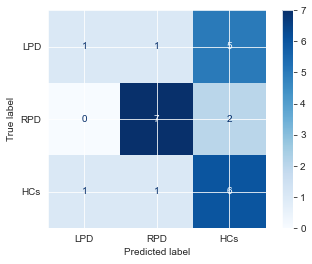

In [121]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Predict the labels of the test set samples
predicted_labels = rf.predict(X_test)
# Build the confusion matrix of our 3-class classification problemcnf_matrix = confusion_matrix(y_test, predicted_labels)print(cnf_matrix)
disp = plot_confusion_matrix(rf, X_test, Y_test,
                                 display_labels=['LPD','RPD','HCs'],
                                 cmap=plt.cm.Blues)
plt.show()

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 34 to 51
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FIRMA       55 non-null     float64
 1   ESPAÑOL     55 non-null     float64
 2   POLACO      55 non-null     float64
 3   GRIEGO      55 non-null     float64
 4   FIRMA.1     55 non-null     float64
 5   ESPAÑOL.1   55 non-null     float64
 6   POLACO.1    55 non-null     float64
 7   GRIEGO.1    55 non-null     float64
 8   FIRMA.2     55 non-null     float64
 9   ESPAÑOL.2   55 non-null     float64
 10  POLACO.2    55 non-null     float64
 11  GRIEGO.2    55 non-null     float64
 12  FIRMA.3     55 non-null     float64
 13  ESPAÑOL.3   55 non-null     float64
 14  POLACO.3    55 non-null     float64
 15  GRIEGO.3    55 non-null     float64
 16  FIRMA.4     55 non-null     float64
 17  ESPAÑOL.4   55 non-null     float64
 18  POLACO.4    55 non-null     float64
 19  GRIEGO.4    55 non-null     fl

In [115]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x=X_train['FIRMA.6'],  # <-- Put your data instead
    y=X_train['POLACO.8'],  # <-- Put your data instead
    z=X_train['ESPAÑOL.6'],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 1,
        'opacity': 0.8,
        'color': Y_train
    }
)

# Configure the layout.
layout = go.Layout(margin={'l': 0, 'r': 0, 'b': 0, 't': 0})

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)